# Conectarse a la API

In [1]:
! pip install inference

In [2]:
# import the inference-sdk
from inference_sdk import InferenceHTTPClient

# initialize the client
CLIENT = InferenceHTTPClient(
    api_url="http://detect.roboflow.com",
    api_key="JVuvSUZ2T8BQEtoGVvtv"
)

# infer on a local image
result = CLIENT.infer("/home/carol/code/cparran/MOJI/raw_data/Nana v01/003.jpg", model_id="manga-text-detection/2")

In [3]:
# Imprimimos las predicciones
result

{'time': 0.2566209130000061,
 'image': {'width': 1530, 'height': 1200},
 'predictions': [{'x': 1306.6259765625,
   'y': 325.72265625,
   'width': 159.873046875,
   'height': 388.4765625,
   'confidence': 0.8699309825897217,
   'class': 'text_free',
   'class_id': 1,
   'detection_id': 'd832891a-1c1c-4e42-9d6c-027818970664'},
  {'x': 388.4765625,
   'y': 167.34375,
   'width': 167.34375,
   'height': 41.8359375,
   'confidence': 0.82112717628479,
   'class': 'text_free',
   'class_id': 1,
   'detection_id': 'e95a0d73-c8a0-4d97-8b77-97480fa91dc4'},
  {'x': 389.2236328125,
   'y': 806.8359375,
   'width': 213.66210937500003,
   'height': 47.8125,
   'confidence': 0.8040770292282104,
   'class': 'text_free',
   'class_id': 1,
   'detection_id': '3b1bf3a3-58b2-464c-a3c1-46e88309a980'},
  {'x': 388.4765625,
   'y': 611.8505859375,
   'width': 227.10937500000003,
   'height': 73.212890625,
   'confidence': 0.8013192415237427,
   'class': 'text_free',
   'class_id': 1,
   'detection_id': '548e

# Otro modo de conectarse a la API

In [4]:
! pip install roboflow

loading Roboflow workspace...
loading Roboflow project...
{'predictions': [{'x': 389, 'y': 804, 'width': 207, 'height': 43, 'confidence': 0.9042551517486572, 'class': 'text_free', 'class_id': 1, 'detection_id': '47d2e84f-bd4c-42c9-b9a6-33da3db896e0', 'image_path': '/home/carol/code/cparran/MOJI/raw_data/Nana v01/003.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 391, 'y': 167, 'width': 182, 'height': 43, 'confidence': 0.8714616894721985, 'class': 'text_free', 'class_id': 1, 'detection_id': '36857291-d178-4055-91ec-02334f1d563f', 'image_path': '/home/carol/code/cparran/MOJI/raw_data/Nana v01/003.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 390, 'y': 522, 'width': 224, 'height': 42, 'confidence': 0.8480061888694763, 'class': 'text_free', 'class_id': 1, 'detection_id': 'ff20bb42-bac4-4fad-ae31-e19714b3d54f', 'image_path': '/home/carol/code/cparran/MOJI/raw_data/Nana v01/003.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 1308, 'y': 332, 'width': 160, 'height': 

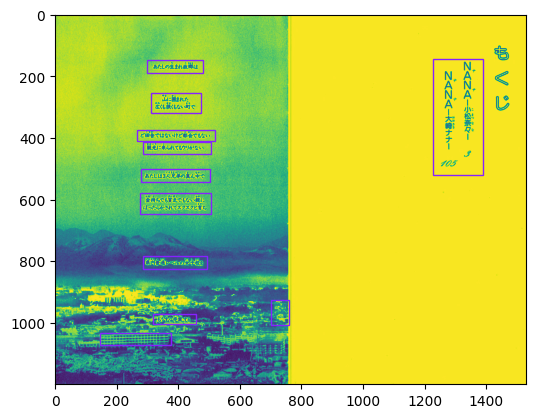

In [5]:
from roboflow import Roboflow
rf = Roboflow(api_key="JVuvSUZ2T8BQEtoGVvtv")
project = rf.workspace().project("manga-text-detection")
model = project.version(2).model

# infer on a local image
print(model.predict("/home/carol/code/cparran/MOJI/raw_data/Nana v01/003.jpg", confidence=40, overlap=30).json())

# visualize your prediction
model.predict("/home/carol/code/cparran/MOJI/raw_data/Nana v01/003.jpg", confidence=40, overlap=30).plot()


# Visualización

In [6]:
from inference import get_model
import supervision as sv
import cv2

#Load model
model = get_model(model_id="manga-text-detection/2")

#Load image with cv2
image = cv2.imread("/home/carol/code/cparran/MOJI/raw_data/Nana v01/003.jpg")

#Run inference
results = model.infer(image)

#Load results into Supervision Detection API
detections = sv.Detections.from_inference(
    results[0].dict(by_alias=True, exclude_none=True)
)

#Create Supervision annotators
bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

#Extract labels array from inference results
labels = [p.class_name for p in results[0].predictions]



#Apply results to image using Supervision annotators
annotated_image = bounding_box_annotator.annotate(scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections, labels=labels
)

#Write annotated image to file or display image
# cv2.imwrite("_05.jpg", annotated_image)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'


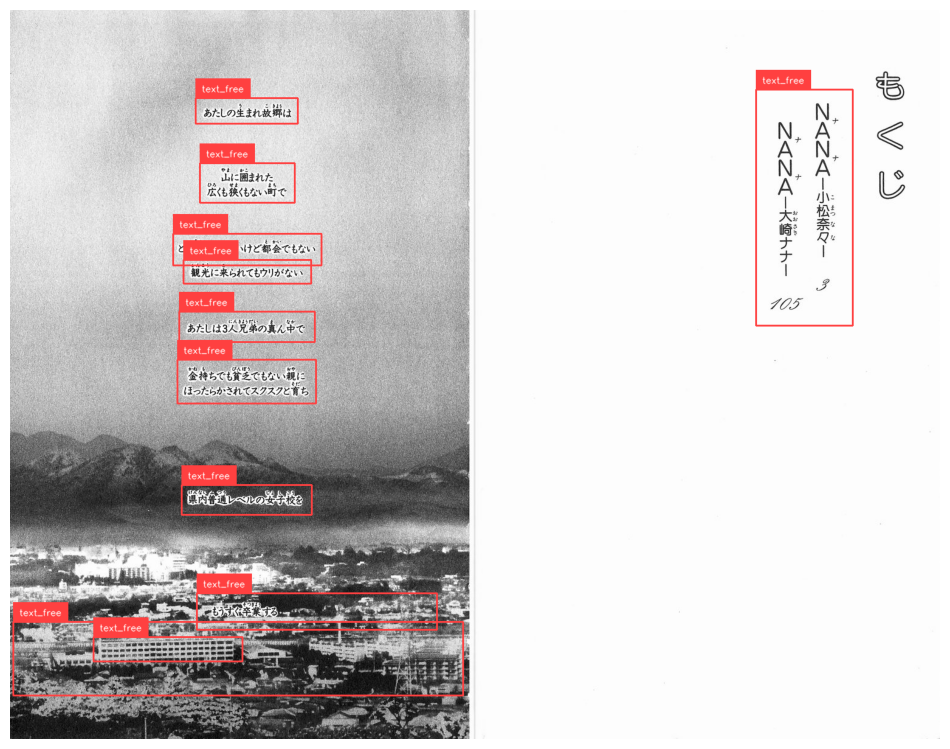

In [7]:
# Visualizamos la imagen segmentada

sv.plot_image(annotated_image)